In [1]:
# Data->Learn->Preditions
# ------------------------
# Information=Features=Attributes
# Title=Label

# Data Type
# -----------
# 1.Numerical -Continuous
# 2.Numerical -Discrete/Categorical
# 3.Text -Categorical
# 4.Text-Random(Not possible in ML use directly)

# Machine Learning
# ##########
# 1.Supervised :- Labelled Data
            # a.Regression :- Labels,Numerical Type(Cont.)
                    # 1.Linear Regression->Simple,Multiple,Polynomial
                    # 2.Suport Vector Regression(SVM)
                    # 3.Kernal Nearest Neighbors(KNN) Regression
                    # 4.Decision Tree Regessor
                    # 5.Random Forest
            # b.Classification :- Labels-Categorical Type
                    # 1.Logistic regression : continuous features
                    # 2.Support Vector classification (svm): continuous features(norm)
                    # 3.KNN : cont. features(norm)
                    # 4.dicision tree : (discrete as well)
                    # 5.Random Forest : (discrete as well)
                    # 6.Naive Bayes :(text features-continuous)
# 2.Unsupervised :- Unlabelled Data
# 3.Semi-supervised :- Both labelled and unlabelled data
# 4.Reinforcement :- instant Learning


#Deep Learning
# 1.Artifical Neural Network
# 2.Convolutional Neural Network


#### Prepare the survival predition Model

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic_train.csv',index_col='PassengerId')

### Exploratory Data Analysis

In [4]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Missing data Tretment

In [6]:
#missing data
pd.isnull(df)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [7]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
pd.isnull(df).sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [9]:
#Approachs
###########
#1.Delete the column:more than 30% data is missing
#2.Delete the rows:less than 5% data is missing
#3.Fill the value:5-30% data is missing
    #Numerical-Fill using mean of data
    #Categorical-ML Inputers

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df['Age'].head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [12]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Age'>

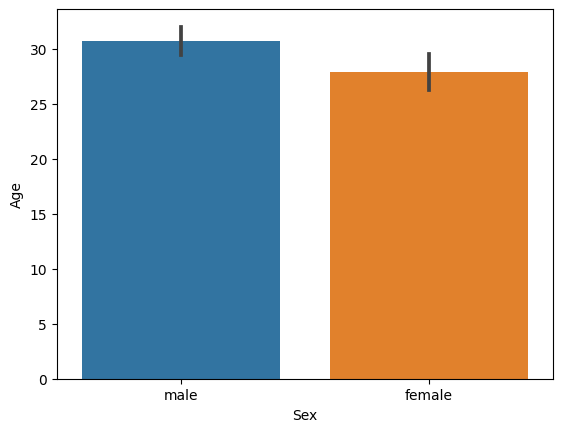

In [13]:
sns.barplot(data=df,x='Sex',y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

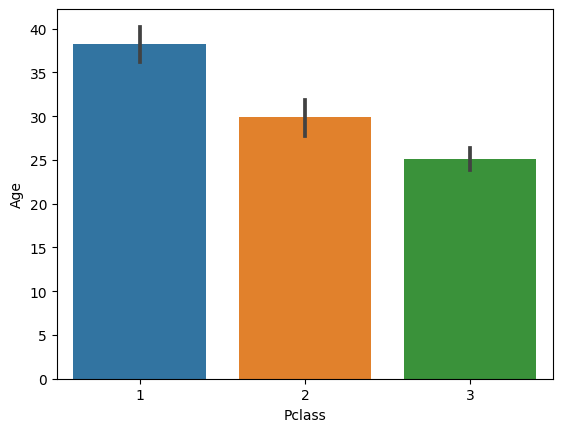

In [14]:
sns.barplot(data=df,x='Pclass',y='Age')

<Axes: xlabel='Sex', ylabel='Age'>

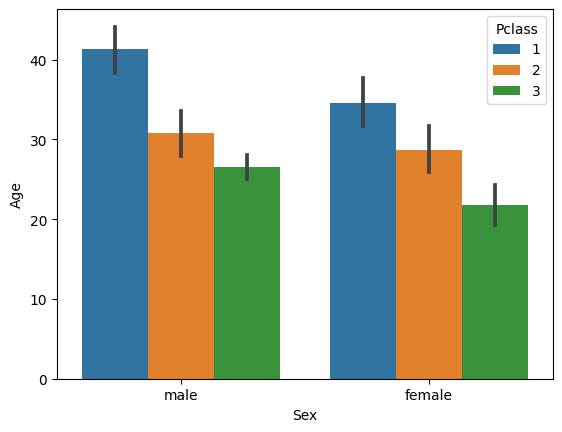

In [15]:
sns.barplot(data=df,x='Sex',y='Age',hue='Pclass')

In [16]:
#### new

In [17]:
nandata=df[pd.isnull(df['Age'])]
nandata

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


In [18]:
nandata[(nandata['Sex']=='male')&(nandata['Pclass']==1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,S
65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,C
169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,S
186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,S
271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,S
285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,S
296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,C
299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,S
352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,S


In [19]:
nonNandata=df[~pd.isnull(df['Age'])]
nonNandata

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [20]:
nonNandata[(nonNandata['Sex']=='male')&(nonNandata['Pclass']==1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
...,...,...,...,...,...,...,...,...,...,...
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,S
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,S


In [21]:
nonNandata[(nonNandata['Sex']=='male')&(nonNandata['Pclass']==1)]['Age'].mean()

41.28138613861386

In [22]:
def age_treatment(row):
    if pd.isnull(row['Age']):
        return df[(df['Sex']==row['Sex']) & (df['Pclass']==row['Pclass'])]['Age'].mean()
    return row['Age']

In [23]:
for ind,row in df.iterrows():
    print(row)
    break

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Embarked                          S
Name: 1, dtype: object


In [24]:
df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
df['Age_']=df.apply(age_treatment,axis=1) #sending single row at a time

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
 10  Age_      891 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.5+ KB


In [27]:
df.drop(['Age'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Age_      891 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [29]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
df.dropna(axis=0,inplace=True) #use this function when missing data in column 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
 9   Age_      889 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB



#### Feature selection
<!-- 1.Feature_columns
    a.numerical
    b.categorical_column
    c.drop_columns
2.Target_col -->

In [32]:
feature_cols=[]
num_cols=['Fare','Age_']
cat_cols=['Pclass','Sex','SibSp','Parch','Embarked']
drop_cols=['Name','Ticket',]
target_col='Survived'

In [33]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Age_'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
 9   Age_      889 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [35]:
df['Pclass'].value_counts() #it seems a categorical data

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [36]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print('-'*20)
    print(df[col].value_counts(),end='\n\n')

Survived : 2
--------------------
Survived
0    549
1    340
Name: count, dtype: int64

Pclass : 3
--------------------
Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Name : 889
--------------------
Name
Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: count, Length: 889, dtype: int64

Sex : 2
--------------------
Sex
male      577
female    312
Name: count, dtype: int64

SibSp : 7
--------------------
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch : 7
--------------------
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      

#### EDA-Univariate analysis

In [37]:
#  Continuous Numeriacal data (at least one)
# --------------
# 1.Lineplot
# 2.Histogram(frequency of data)
# 3.KDE plot(kernal density seimator)


# Discrete numerical data(at least one)
# ----------------
# 1.Pie chart

# Categorical data(at least one)
# -----------------
# 1.Countplot (value_counts)(Hue support)

# Numerical vs Numerical
# ----------------
# 1.KDEplot
# 2.Scatterplot(Hue suppport)
# 3.Heatplot
# 4.Pairplot(Hue support)

# Numerical vs categorical data
# --------------
# 1.boxplat(Hue support)
# 2.Bar plot (mean of data)(Hue support)

# Note:-Hue:-categorical data 

In [38]:
import matplotlib.pyplot as plt

In [39]:
sns.set_style('darkgrid')

Fare


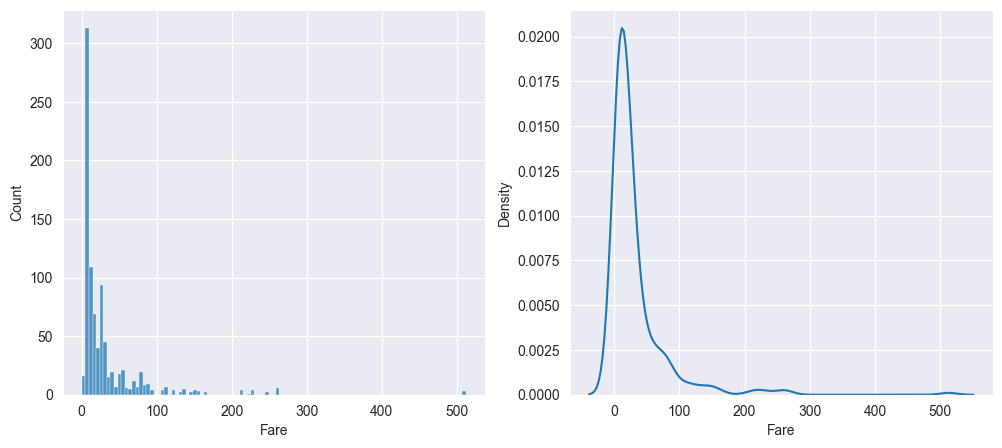

Age_


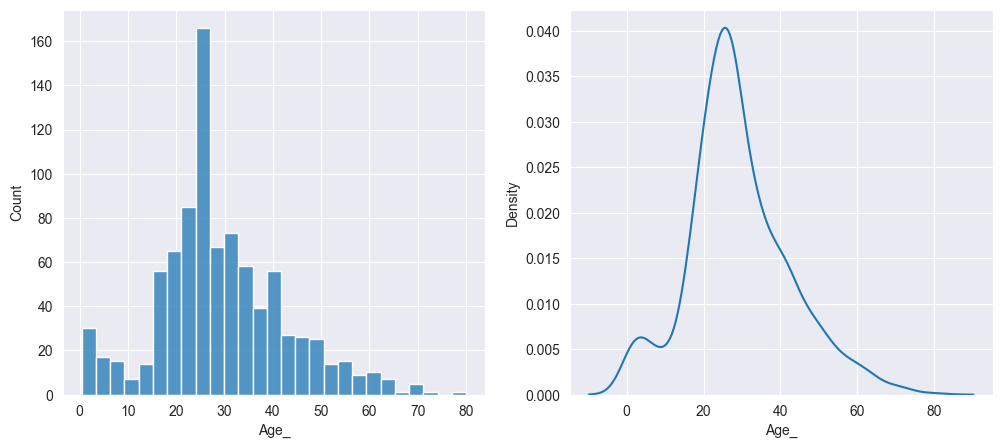

In [40]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)#1 row,2 col
    sns.histplot(data=df,x=col)
    plt.subplot(1,2,2)
    sns.kdeplot(data=df,x=col)
    plt.show()

Pclass


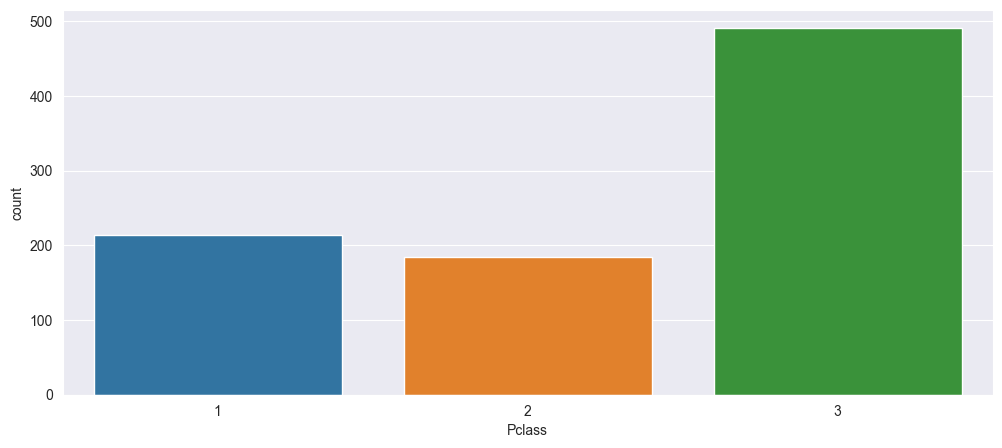

Sex


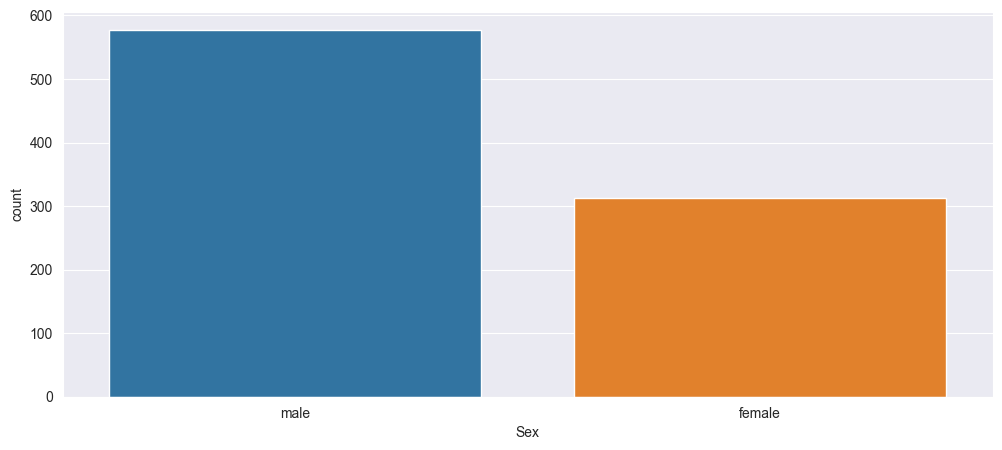

SibSp


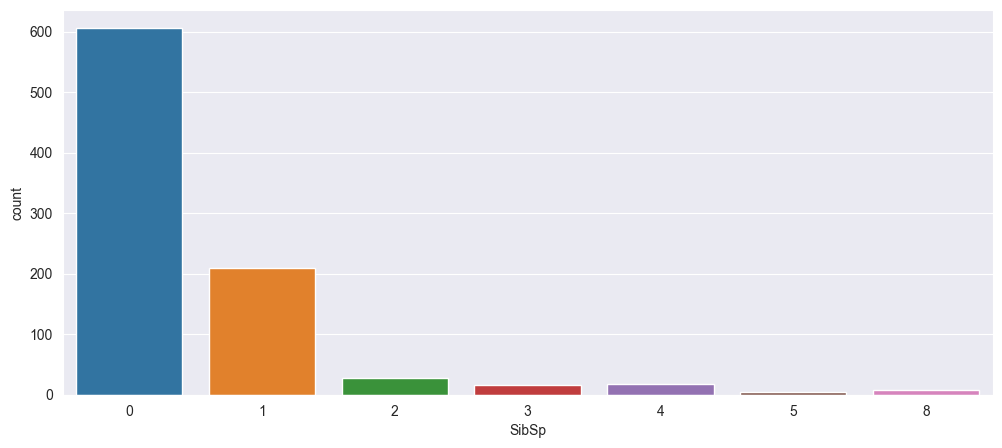

Parch


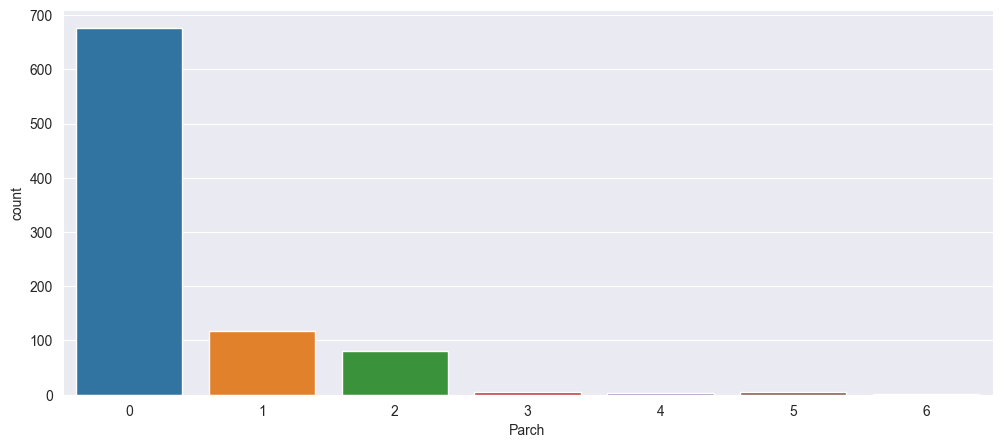

Embarked


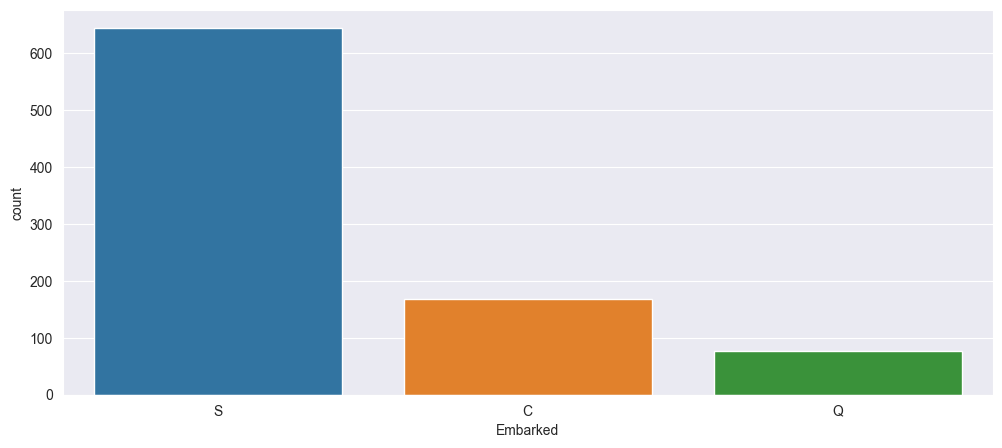

In [41]:
for col in cat_cols:
    print(col)
    plt.figure(figsize=(12,5))
    sns.countplot(data=df,x=col)
    plt.show()

### EDA-bivariate Analysis

Fare


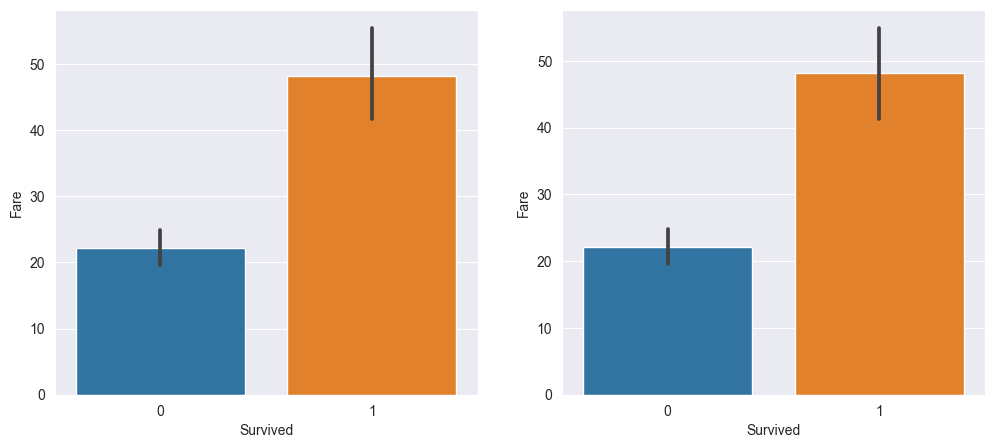

Age_


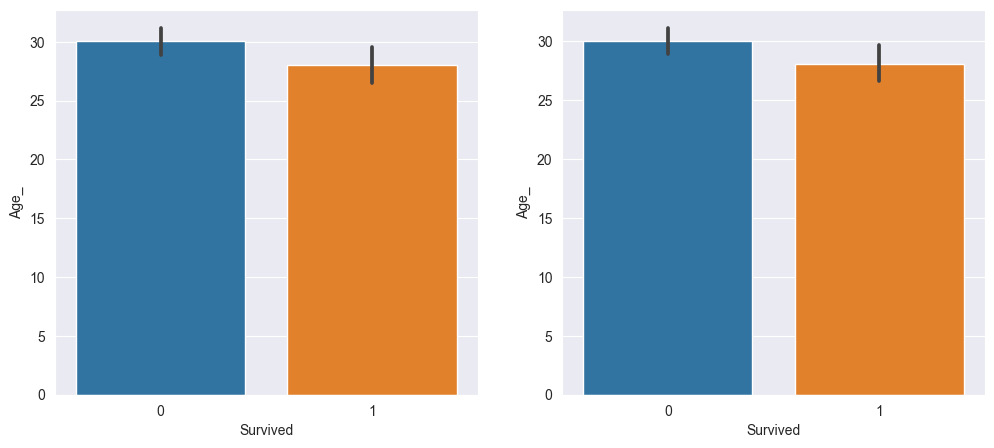

In [42]:
for col in num_cols: #target and categorical datas
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)#1 row,2 col
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,2,2)
    sns.barplot(data=df,x=target_col,y=col)
    plt.show()

Pclass


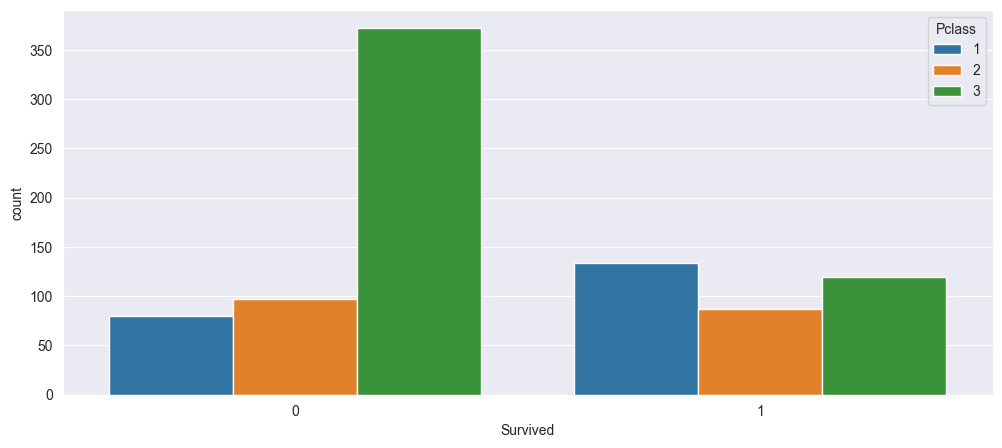

Sex


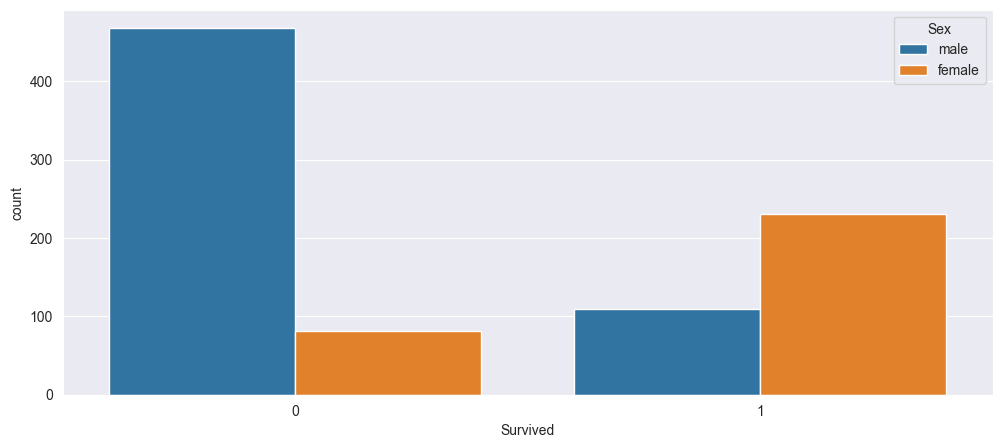

SibSp


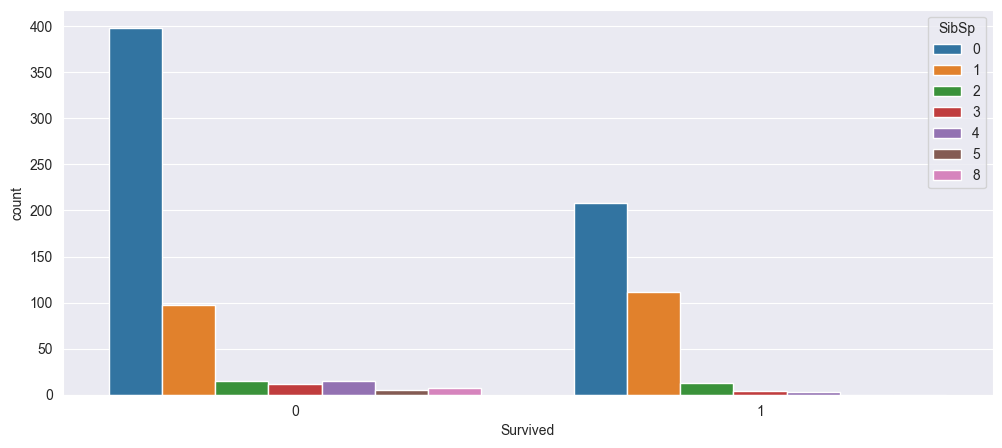

Parch


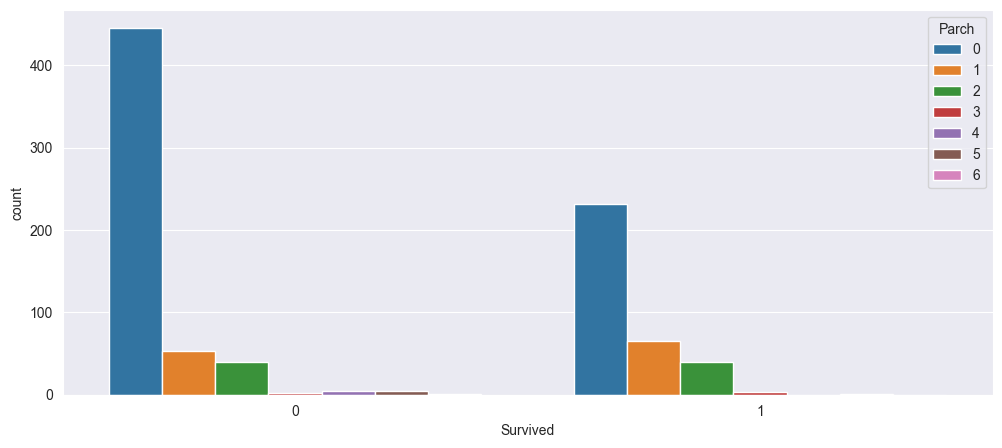

Embarked


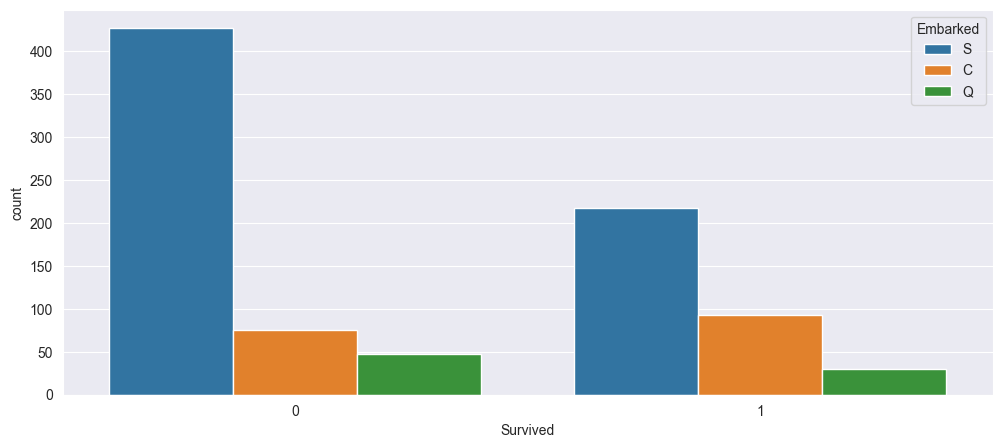

In [43]:
for col in cat_cols:
    print(col)
    plt.figure(figsize=(12,5))
    sns.countplot(data=df,x=target_col,hue=col)
    plt.show()


In [44]:
df['Sex']

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 889, dtype: object

In [45]:
pd.get_dummies(df['Sex'])

,female,male
PassengerId,,
1,False,True
2,True,False
3,True,False
4,True,False
5,False,True
...,...,...
887,False,True
888,True,False
889,True,False


In [46]:
drop_cols

['Name', 'Ticket']

In [47]:
df.drop(drop_cols,axis=1)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_
PassengerId,,,,,,,,
1,0,3,male,1,0,7.2500,S,22.00
2,1,1,female,1,0,71.2833,C,38.00
3,1,3,female,0,0,7.9250,S,26.00
4,1,1,female,1,0,53.1000,S,35.00
5,0,3,male,0,0,8.0500,S,35.00
...,...,...,...,...,...,...,...,...
887,0,2,male,0,0,13.0000,S,27.00
888,1,1,female,0,0,30.0000,S,19.00
889,0,3,female,1,2,23.4500,S,21.75


### Multivariate Analysis

<Axes: >

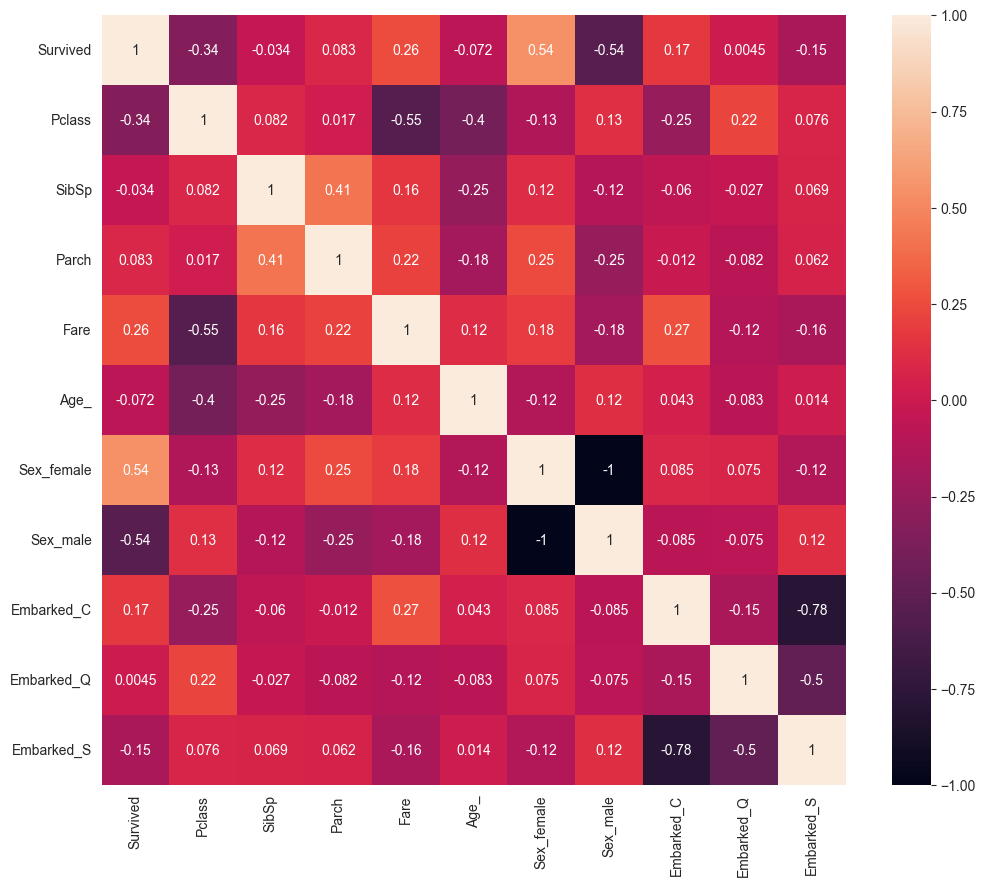

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.get_dummies(df.drop(drop_cols,axis=1)).corr(),annot=True)
#get_dummies :seperate, drop : drop columns , axis=1 : row wise , corr():correlation the data between -1.0 to +1.0  convert into heatmap with color seperation

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


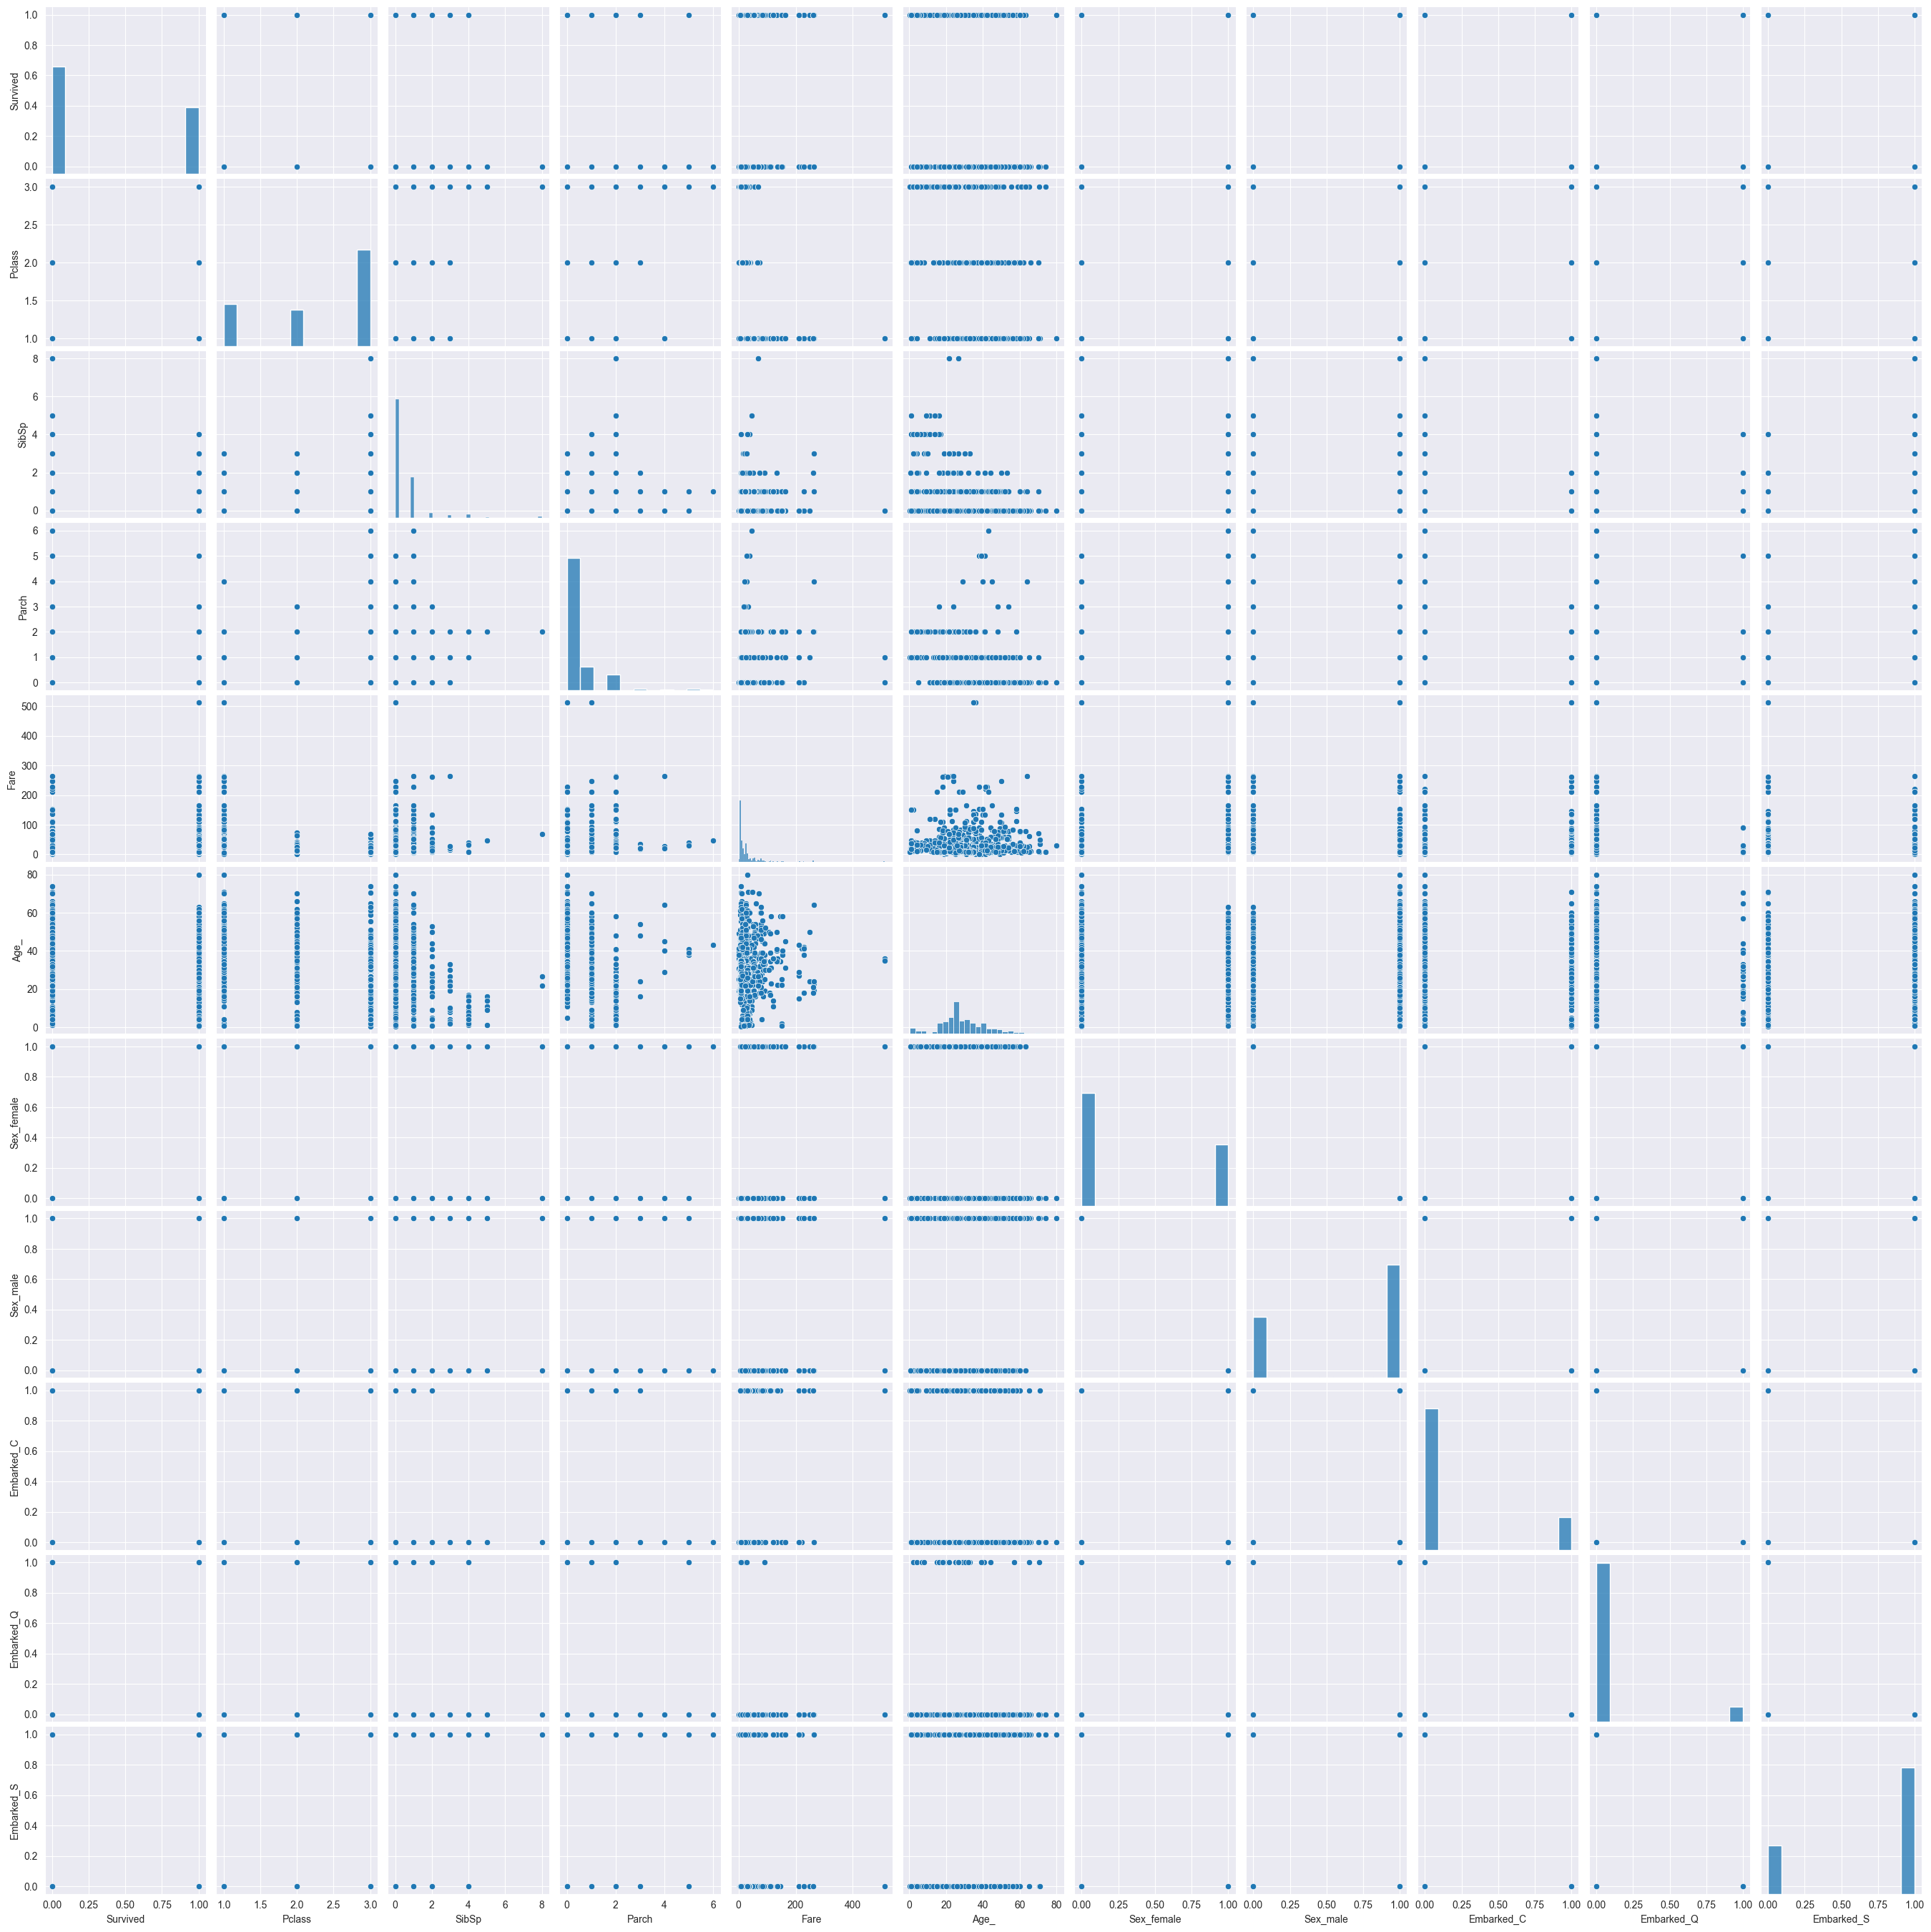

In [49]:
sns.pairplot(pd.get_dummies(df.drop(drop_cols,axis=1)))
#not helping in this case

In [50]:
df_=pd.get_dummies(df.drop(drop_cols,axis=1),dtype=int)

In [51]:
df_.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
# feature_cols=[]
feature_cols = ['Age_', 'Pclass',  'Parch', 'Sex_male', 'Embarked_C',  'Embarked_S']
# feature_cols=['Pclass', 'SibSp', 'Parch', 'Fare', 'Age_', 'Sex_female',
#        'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
# feature_cols=[ 'Pclass',  'Parch', 'Sex_male', 'Embarked_C',  'Embarked_S']

In [53]:
df_[feature_cols].head()

,Age_,Pclass,Parch,Sex_male,Embarked_C,Embarked_S
PassengerId,,,,,,
1,22.0,3,0,1,0,1
2,38.0,1,0,0,1,0
3,26.0,3,0,0,0,1
4,35.0,1,0,0,0,1
5,35.0,3,0,1,0,1


In [54]:
features=df_[feature_cols] # x
target=df_[target_col]     # y

In [55]:
features.head()

,Age_,Pclass,Parch,Sex_male,Embarked_C,Embarked_S
PassengerId,,,,,,
1,22.0,3,0,1,0,1
2,38.0,1,0,0,1,0
3,26.0,3,0,0,0,1
4,35.0,1,0,0,0,1
5,35.0,3,0,1,0,1


In [56]:
target.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [57]:
features.shape

(889, 6)

In [58]:
#machine learning
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.75,random_state=60)

In [59]:
xtrain.shape

(666, 6)

In [60]:
xtest.shape

(223, 6)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model_logReg=LogisticRegression().fit(xtrain,ytrain)
model_logReg

LogisticRegression()

In [63]:
type(model_logReg)

sklearn.linear_model._logistic.LogisticRegression

In [64]:
round(model_logReg.score(xtest,ytest)*100,2)

78.03

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
ypred_test=model_logReg.predict(xtest)

In [67]:
confusion_matrix(ytest,ypred_test)

array([[114,  17],
       [ 32,  60]], dtype=int64)

In [68]:
#sns.heatmap(pd.DataFrame(confusion_matrix(xtest,ytest)),annot=True)

<Axes: >

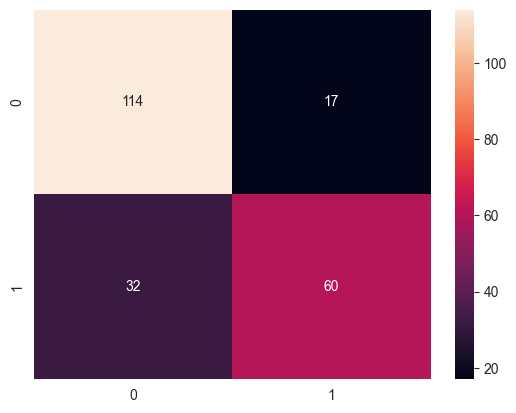

In [69]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d')

In [70]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       131
           1       0.78      0.65      0.71        92

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
params={
    'penalty':[None,'l1', 'l2', 'elasticnet'],
    'tol':[0.0001,0.001,0.01,0.1,1.0],
    'C':[0.0001,0.001,0.01,0.1,1.0,10.0],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

In [73]:
from warnings import filterwarnings
filterwarnings('ignore')

In [74]:
model_gscv=GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.0001;, score=0.821 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.0001;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.0001;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.0001;, score=0.872 total time=   0.0s
[CV 5/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.0001;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.001;, score=0.821 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.001;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.001;, score=0.797 total time=   0.0s


[CV 4/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.001;, score=0.872 total time=   0.0s
[CV 5/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.001;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.01;, score=0.821 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.01;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.01;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.01;, score=0.872 total time=   0.0s
[CV 5/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.01;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.1;, score=0.821 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.1;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.1;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.0001, penalty=None, solver=lbfgs, tol=0.1;, score=0.87

In [75]:
model_gscv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1.0}

In [76]:
model_gscv.best_estimator_.score(xtest,ytest)*100

78.9237668161435

In [77]:
xtrain.head()

,Age_,Pclass,Parch,Sex_male,Embarked_C,Embarked_S
PassengerId,,,,,,
724,50.000000,2,0,1,0,1
873,33.000000,1,0,1,0,1
849,28.000000,2,1,1,0,1
496,26.507589,3,0,1,1,0
787,18.000000,3,0,0,0,1


In [78]:
### this logistic regession is not good for predict the answer of this type problem

In [79]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC

In [80]:
print(DTC)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [81]:
def model_create(algo,):
    print(algo)
    model=algo().fit(xtrain,ytrain)
    score=round(model.score(xtest,ytest)*100,2)
    print('Test Score:',score)
    print('')
    ypred=model.predict(xtest)
    sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d')
    plt.show()
    print(classification_report(ytest,ypred))
    print('-'*20)
    return model

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Test Score: 77.58



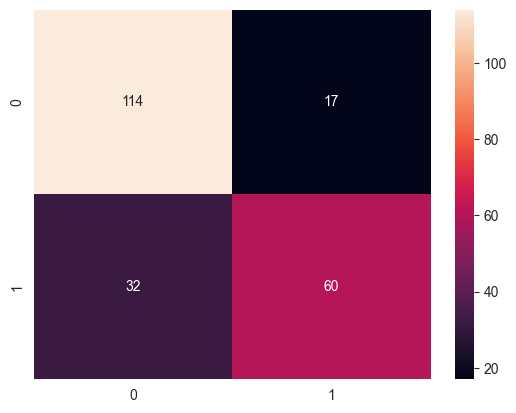

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       131
           1       0.79      0.62      0.70        92

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.77       223

--------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Score: 78.03



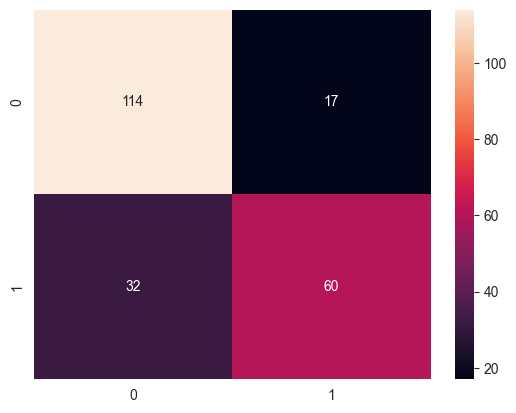

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       131
           1       0.79      0.63      0.70        92

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

--------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test Score: 75.78



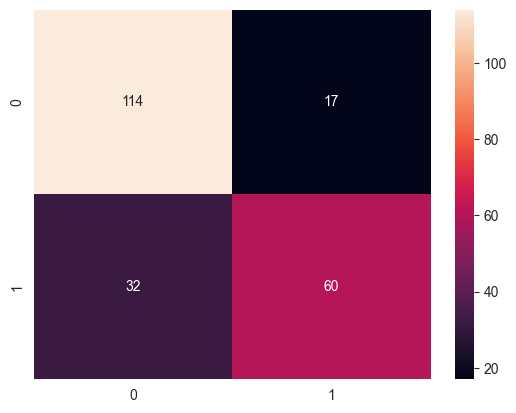

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       131
           1       0.77      0.59      0.67        92

    accuracy                           0.76       223
   macro avg       0.76      0.73      0.74       223
weighted avg       0.76      0.76      0.75       223

--------------------
<class 'sklearn.svm._classes.SVC'>
Test Score: 59.19



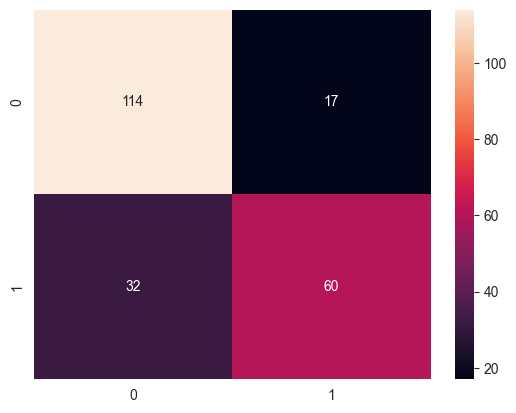

              precision    recall  f1-score   support

           0       0.60      0.95      0.73       131
           1       0.53      0.09      0.15        92

    accuracy                           0.59       223
   macro avg       0.56      0.52      0.44       223
weighted avg       0.57      0.59      0.49       223

--------------------


In [82]:
model_dtc=model_create(DTC)
model_rfc=model_create(RFC)
model_knc=model_create(KNC)
model_svc=model_create(SVC)

In [83]:
def model_gs_create(algo,parameters):
    print(algo)
    model_gs=GridSearchCV(algo(),param_grid=parameters).fit(xtrain,ytrain)
    model=model_gs.best_estimator_
    score=round(model.score(xtest,ytest)*100,2)
    print('Test Score:',score)
    print('')
    ypred=model.predict(xtest)
    sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d')
    plt.show()
    print(classification_report(ytest,ypred))
    print('-'*20)
    return model

In [84]:
KNC()

KNeighborsClassifier()

In [85]:
params_dtc={
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,5,10,15]
}
params_rfc={
    'n_estimators':[10,50,100,150,200],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,5,10,15]
}
params_svc={
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':[0.0001,0.001,0.01,0.1,1.0],
    'C':[0.0001,0.001,0.01,0.1,1.0,10.0,100.0],
}
params_knn={
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
   
}

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Test Score: 76.68



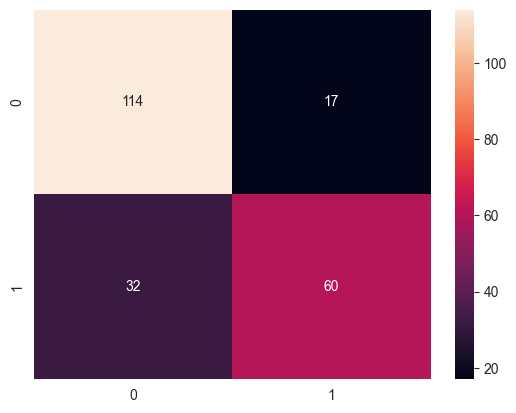

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       131
           1       0.80      0.58      0.67        92

    accuracy                           0.77       223
   macro avg       0.78      0.74      0.75       223
weighted avg       0.77      0.77      0.76       223

--------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test Score: 78.48



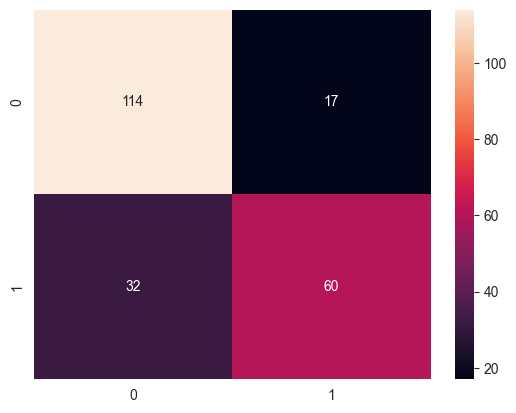

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       131
           1       0.78      0.66      0.72        92

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

--------------------
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test Score: 75.78



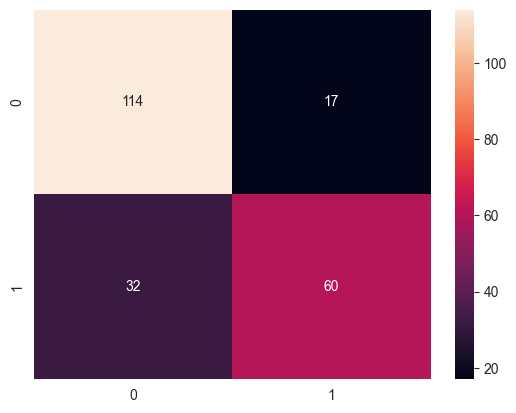

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       131
           1       0.76      0.61      0.67        92

    accuracy                           0.76       223
   macro avg       0.76      0.74      0.74       223
weighted avg       0.76      0.76      0.75       223

--------------------
<class 'sklearn.svm._classes.SVC'>


In [86]:
model_gdtc=model_gs_create(DTC,params_dtc)
model_grfc=model_gs_create(RFC,params_rfc)
model_gknc=model_gs_create(KNC,params_knn)
model_gsvc=model_gs_create(SVC,params_svc)

In [ ]:
#so in that logistic is good and also knn,random forest aloso woek good
 